## Working with Coinmarketcap API

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
type(data)

dict

In [189]:
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

df = pd.json_normalize(data["data"])
df["timestamp"] = pd.to_datetime("now")
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11800,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19783815.00,19783815.00,False,NaN,1,NaN,NaN,None,2024-11-18T07:16:00.000Z,91901.11,47096486330.26,4.98,1.28,1.68,13.48,34.52,48.20,50.90,1818154522622.06,58.86,1929923271879.73,None,2024-11-18T07:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 11:46:07.608772
1,1027,Ethereum,ETH,ethereum,9562,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120424008.03,120424008.03,True,NaN,2,NaN,NaN,None,2024-11-18T07:16:00.000Z,3138.10,25494389444.13,-13.53,0.68,0.50,-0.11,18.88,29.62,17.37,377902432821.54,12.23,377902432821.54,None,2024-11-18T07:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 11:46:07.608772
2,825,Tether USDt,USDT,tether,103756,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,127539192697.57,129825664180.66,True,NaN,3,NaN,NaN,None,2024-11-18T07:16:00.000Z,1.00,123023077054.89,-13.79,0.03,0.04,-0.03,0.04,0.01,-0.01,127586231869.54,4.13,129873546652.03,None,2024-11-18T07:16:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-18 11:46:07.608772
3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,474601701.19,588574940.66,True,NaN,4,NaN,NaN,None,2024-11-18T07:17:00.000Z,240.43,8312479206.21,8.74,-0.65,1.41,15.69,55.66,73.64,63.40,114108336482.76,3.69,141510886298.23,None,2024-11-18T07:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 11:46:07.608772
4,1839,BNB,BNB,bnb,2282,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,143098711.49,143098711.49,False,NaN,5,NaN,NaN,None,2024-11-18T07:17:00.000Z,627.04,2234884981.05,-7.87,0.38,-1.54,1.77,4.97,12.51,10.55,89728677734.76,2.90,89728677734.76,None,2024-11-18T07:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 11:46:07.608772
5,52,XRP,XRP,xrp,1430,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,56931242174.00,99987013354.00,False,NaN,6,NaN,NaN,None,2024-11-18T07:16:00.000Z,1.15,10821674602.65,-55.18,-2.01,7.50,100.03,110.77,97.70,88.24,65640104789.14,2.12,115297158963.30,None,2024-11-18T07:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 11:46:07.608772
6,74,Dogecoin,DOGE,dogecoin,1101,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146839036383.71,146839036383.71,True,NaN,7,NaN,NaN,None,2024-11-18T07:16:00.000Z,0.38,7271237344.97,-4.94,2.42,6.40,34.21,161.10,263.66,259.46,55500181415.06,1.80,55500181415.06,None,2024-11-18T07:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 11:46:07.608772
7,3408,USDC,USDC,usd-coin,23140,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,37123069305.84,37123069305.84,False,NaN,8,NaN,NaN,None,2024-11-18T07:17:00.000Z,1.00,7637141409.62,-2.54,0.04,0.04,0.05,0.02,0.03,0.03,37131053497.99,1.20,37131053497.99,None,2024-11-18T07:17:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-18 11:46:07.608772
8,2010,Cardano,ADA,cardano,1352,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00,35033776787.31,44995037803.61,False,NaN,9,NaN,NaN,None,2024-11-18T07:17:00.000Z,0.76,1970582444.31,-60.71,-0.97,4.87,32.14,115.08,119.38,121.56,26612730153.97,0.86,34183378634.83,

In [241]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #Normalize data
    df = pd.json_normalize(data["data"])
    df["timestamp"] = pd.to_datetime("now")
    # df = pd.concat([df,df2])

    #Saving changes to an external file
    if not os.path.isfile(r"C:\Users\Misha\Documents\5. Python\API CSVs\API4.csv"):
        df.to_csv(r"C:\Users\Misha\Documents\5. Python\API CSVs\API4.csv", header = "column_names")
    else:
        df.to_csv(r"C:\Users\Misha\Documents\5. Python\API CSVs\API4.csv", mode = "a", header = False)


In [243]:
import os
from time import time 
from time import sleep

for i in range(10):
    api_runner()
    print("API Runner completed")
    sleep(300)
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [245]:
df2 = pd.read_csv(r"C:\Users\Misha\Documents\5. Python\API CSVs\API4.csv")
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11800,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19783884.00,19783884.00,False,NaN,1,NaN,NaN,NaN,2024-11-18T10:57:00.000Z,91792.02,49263280833.09,8.50,0.01,0.82,11.88,34.50,47.19,51.04,1816002735699.19,58.87,1927632483575.17,NaN,2024-11-18T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:00:09.284176
1,1,1027,Ethereum,ETH,ethereum,9562,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120424008.03,120424008.03,True,NaN,2,NaN,NaN,NaN,2024-11-18T10:57:00.000Z,3118.50,25296721968.93,-15.75,0.27,-0.62,-2.39,18.11,28.46,17.35,375542069926.46,12.17,375542069926.46,NaN,2024-11-18T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:00:09.284176
2,2,825,Tether USDt,USDT,tether,103804,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,127539192697.57,129825664180.66,True,NaN,3,NaN,NaN,NaN,2024-11-18T10:57:00.000Z,1.00,124505171221.24,-13.41,-0.01,-0.01,-0.07,-0.00,-0.04,-0.06,127530558891.29,4.13,129816875590.97,NaN,2024-11-18T10:57:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-18 12:00:09.284176
3,3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,474595837.89,588572622.34,True,NaN,4,NaN,NaN,NaN,2024-11-18T10:58:00.000Z,247.76,8082076744.90,-7.12,1.20,2.93,14.80,60.43,78.72,69.35,117584518071.53,3.81,145823082762.24,NaN,2024-11-18T10:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:00:09.284176
4,4,1839,BNB,BNB,bnb,2282,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142587746.34,142587746.34,False,NaN,5,NaN,NaN,NaN,2024-11-18T10:58:00.000Z,623.30,2133755712.84,-17.47,0.41,-1.77,-0.49,4.25,11.96,9.75,88875075854.65,2.88,88875075854.65,NaN,2024-11-18T10:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:00:09.284176
5,5,52,XRP,XRP,xrp,1430,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,56931242174.00,99987013354.00,False,NaN,6,NaN,NaN,NaN,2024-11-18T10:58:00.000Z,1.14,10409182174.90,-54.20,1.48,7.95,94.94,109.95,95.75,88.37,65147976953.42,2.11,114432734058.93,NaN,2024-11-18T10:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:00:09.284176
6,6,74,Dogecoin,DOGE,dogecoin,1101,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146840966383.71,146840966383.71,True,NaN,7,NaN,NaN,NaN,2024-11-18T10:57:00.000Z,0.37,6958049547.54,-12.53,0.21,2.01,29.11,154.75,256.57,252.54,54636233509.26,1.77,54636233509.26,NaN,2024-11-18T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:00:09.284176
7,7,3408,USDC,USDC,usd-coin,23145,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,37118675624.50,37118675624.50,False,NaN,8,NaN,NaN,NaN,2024-11-18T10:58:00.000Z,1.00,8017164715.69,0.55,-0.02,0.00,0.01,-0.01,-0.01,-0.01,37115156574.77,1.20,37115156574.77,NaN,2024-11-18T10:58:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-18 12:00:09.284176
8,8,2010,Cardano,ADA,cardano,1352,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00,35033776787.31,44995037803.61,False,NaN,9,NaN,NaN,NaN,2024-11-18T10:58:00.000Z,0.76,2085907826.65,-52.50,0.24,5.35,28.45,115.15,118.71,120.98,26656902746.20,0

In [247]:
df.head(3)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11800,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19783896.00,19783896.00,False,NaN,1,NaN,NaN,None,2024-11-18T11:39:00.000Z,90716.80,49998835762.80,10.30,-1.37,0.02,10.50,33.16,45.00,49.78,1794731702878.94,58.75,1905052764150.08,None,2024-11-18T11:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:40:19.480339
1,1027,Ethereum,ETH,ethereum,9562,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120424008.03,120424008.03,True,NaN,2,NaN,NaN,None,2024-11-18T11:39:00.000Z,3074.30,25180226460.66,-15.39,-1.55,-1.32,-3.69,16.62,26.58,16.09,370219437060.64,12.12,370219437060.64,None,2024-11-18T11:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:40:19.480339
2,825,Tether USDt,USDT,tether,103811,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,127539192697.57,129825664180.66,True,NaN,3,NaN,NaN,None,2024-11-18T11:39:00.000Z,1.00,125022526969.41,-12.46,-0.01,-0.00,-0.07,-0.00,-0.02,-0.03,127540172010.51,4.17,129826661050.33,None,2024-11-18T11:39:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-18 12:40:19.480339


In [249]:
# Adjusting the display of large floats to show only 2 decimal places
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [251]:
df.head(3)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11800,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19783896.00,19783896.00,False,NaN,1,NaN,NaN,None,2024-11-18T11:39:00.000Z,90716.80,49998835762.80,10.30,-1.37,0.02,10.50,33.16,45.00,49.78,1794731702878.94,58.75,1905052764150.08,None,2024-11-18T11:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:40:19.480339
1,1027,Ethereum,ETH,ethereum,9562,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120424008.03,120424008.03,True,NaN,2,NaN,NaN,None,2024-11-18T11:39:00.000Z,3074.30,25180226460.66,-15.39,-1.55,-1.32,-3.69,16.62,26.58,16.09,370219437060.64,12.12,370219437060.64,None,2024-11-18T11:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:40:19.480339
2,825,Tether USDt,USDT,tether,103811,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,127539192697.57,129825664180.66,True,NaN,3,NaN,NaN,None,2024-11-18T11:39:00.000Z,1.00,125022526969.41,-12.46,-0.01,-0.00,-0.07,-0.00,-0.02,-0.03,127540172010.51,4.17,129826661050.33,None,2024-11-18T11:39:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-18 12:40:19.480339


In [253]:
df3 = df.groupby("name", sort=False)[["quote.USD.percent_change_1h","quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d",	"quote.USD.percent_change_60d","quote.USD.percent_change_90d"]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.37,0.02,10.50,33.16,45.00,49.78
Ethereum,-1.55,-1.32,-3.69,16.62,26.58,16.09
Tether USDt,-0.01,-0.00,-0.07,-0.00,-0.02,-0.03
Solana,-1.19,2.51,12.64,58.09,75.62,67.15
BNB,-0.92,-2.19,-1.17,3.24,10.59,8.61
XRP,-1.24,7.48,92.40,107.59,92.85,85.36
Dogecoin,-1.87,1.33,24.80,155.84,250.77,247.89
USDC,-0.01,0.00,0.01,-0.00,0.00,-0.01
Cardano,-2.10,4.11,25.65,111.53,114.13,116.40


In [255]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -1.37
              quote.USD.percent_change_24h     0.02
              quote.USD.percent_change_7d     10.50
              quote.USD.percent_change_30d    33.16
              quote.USD.percent_change_60d    45.00
              quote.USD.percent_change_90d    49.78
Ethereum      quote.USD.percent_change_1h     -1.55
              quote.USD.percent_change_24h    -1.32
              quote.USD.percent_change_7d     -3.69
              quote.USD.percent_change_30d    16.62
              quote.USD.percent_change_60d    26.58
              quote.USD.percent_change_90d    16.09
Tether USDt   quote.USD.percent_change_1h     -0.01
              quote.USD.percent_change_24h    -0.00
              quote.USD.percent_change_7d     -0.07
              quote.USD.percent_change_30d    -0.00
              quote.USD.percent_change_60d    -0.02
              quote.USD.percent_change_90d    -0.03
Solana        quote.U

In [257]:
type(df4)

pandas.core.series.Series

In [259]:
# Stacking df3 changed it to series
type(df3)

pandas.core.frame.DataFrame

In [261]:
#Switching the result back to a dataframe
df5 = df4.to_frame(name = "values")
df5

values
name                                             
Bitcoin      quote.USD.percent_change_1h    -1.37
             quote.USD.percent_change_24h    0.02
             quote.USD.percent_change_7d    10.50
             quote.USD.percent_change_30d   33.16
             quote.USD.percent_change_60d   45.00
             quote.USD.percent_change_90d   49.78
Ethereum     quote.USD.percent_change_1h    -1.55
             quote.USD.percent_change_24h   -1.32
             quote.USD.percent_change_7d    -3.69
             quote.USD.percent_change_30d   16.62
             quote.USD.percent_change_60d   26.58
             quote.USD.percent_change_90d   16.09
Tether USDt  quote.USD.percent_change_1h    -0.01
             quote.USD.percent_change_24h   -0.00
             quote.USD.percent_change_7d    -0.07
             quote.USD.percent_change_30d   -0.00
             quote.USD.percent_change_60d   -0.02
             quote.USD.percent_change_90d   -0.03
Solana       quote.USD.percent_change_1h    -1.19
             quote.USD.percent_change_24h    2.51
             quote.USD.percent_change_7d    12.64
             quote.USD.percent_change_30d   58.09
             quote.USD.percent_change_60d   75.62
             quote.USD.percent_change_90d   67.15
BNB          quote.USD.percent_change_1h    -0.92
             quote.USD.percent_change_24h   -2.19
             quote.USD.percent_change_7d    -1.17
             quote.USD.percent_change_30d    3.24
             quote.USD.percent_change_60d   10.59
             quote.USD.percent_change_90d    8.61
XRP          quote.USD.percent_change_1h    -1.24
             quote.USD.percent_change_24h    7.48
             quote.USD.percent_change_7d    92.40
             quote.USD.percent_change_30d  107.59
             quote.USD.percent_change_60d   92.85
             quote.USD.percent_change_90d   85.36
Dogecoin     quote.USD.percent_change_1h    -1.87
             quote.USD.percent_change_24h    1.33
             quote.USD.percent_change_7d    24.80
             quote.USD.percent_change_30d  155.84
             quote.USD.percent_change_60d  250.77
             quote.USD.percent_change_90d  247.89
USDC         quote.USD.percent_change_1h    -0.01
             quote.USD.percent_change_24h    0.00
             quote.USD.percent_change_7d     0.01
             quote.USD.percent_change_30d   -0.00
             quote.USD.percent_change_60d    0.00
             quote.USD.percent_change_90d   -0.01
Cardano      quote.USD.percent_change_1h    -2.10
             quote.USD.percent_change_24h    4.11
             quote.USD.percent_change_7d    25.65
             quote.USD.percent_change_30d  111.53
             quote.USD.percent_change_60d  114.13
             quote.USD.percent_change_90d  116.40
TRON         quote.USD.percent_change_1h    -1.02
             quote.USD.percent_change_24h    3.19
             quote.USD.percent_change_7d    21.66
             quote.USD.percent_change_30d   27.34
             quote.USD.percent_change_60d   33.47
             quote.USD.percent_change_90d   35.63
Shiba Inu    quote.USD.percent_change_1h    -2.14
             quote.USD.percent_change_24h    1.21
             quote.USD.percent_change_7d    -4.66
             quote.USD.percent_change_30d   30.21
             quote.USD.percent_change_60d   75.93
             quote.USD.percent_change_90d   80.29
Avalanche    quote.USD.percent_change_1h    -1.67
             quote.USD.percent_change_24h   -4.16
             quote.USD.percent_change_7d     9.49
             quote.USD.percent_change_30d   26.16
             quote.USD.percent_change_60d   33.79
             quote.USD.percent_change_90d   59.18
Toncoin      quote.USD.percent_change_1h    -0.88
             quote.USD.percent_change_24h   -0.76
             quote.USD.percent_change_7d     2.33
             quote.USD.percent_change_30d    4.02
             quote.USD.percent_change_60d   -5.71
             quote.USD.percent_change_90d  -20.43
Sui          quote.USD.percent_change_1h   

In [263]:
type(df5)

pandas.core.frame.DataFrame

In [265]:
# Using reset index to create a numeric index for our dataframe

# df5.reset_index(inplace= True)
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-1.37
1,Bitcoin,quote.USD.percent_change_24h,0.02
2,Bitcoin,quote.USD.percent_change_7d,10.50
3,Bitcoin,quote.USD.percent_change_30d,33.16
4,Bitcoin,quote.USD.percent_change_60d,45.00
5,Bitcoin,quote.USD.percent_change_90d,49.78
6,Ethereum,quote.USD.percent_change_1h,-1.55
7,Ethereum,quote.USD.percent_change_24h,-1.32
8,Ethereum,quote.USD.percent_change_7d,-3.69
9,Ethereum,quote.USD.percent_change_30d,16.62


In [267]:
df7 = df6.rename(columns = {"level_1" : "percent_change"})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.37
1,Bitcoin,quote.USD.percent_change_24h,0.02
2,Bitcoin,quote.USD.percent_change_7d,10.50
3,Bitcoin,quote.USD.percent_change_30d,33.16
4,Bitcoin,quote.USD.percent_change_60d,45.00
5,Bitcoin,quote.USD.percent_change_90d,49.78
6,Ethereum,quote.USD.percent_change_1h,-1.55
7,Ethereum,quote.USD.percent_change_24h,-1.32
8,Ethereum,quote.USD.percent_change_7d,-3.69
9,Ethereum,quote.USD.percent_change_30d,16.62


In [269]:
df7["percent_change"] = df7["percent_change"].replace(["quote.USD.percent_change_1h","quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d",	"quote.USD.percent_change_60d","quote.USD.percent_change_90d"],["1h", "24h", "7d", "30d", "60d", "90d"])
df7

,name,percent_change,values
0,Bitcoin,1h,-1.37
1,Bitcoin,24h,0.02
2,Bitcoin,7d,10.50
3,Bitcoin,30d,33.16
4,Bitcoin,60d,45.00
5,Bitcoin,90d,49.78
6,Ethereum,1h,-1.55
7,Ethereum,24h,-1.32
8,Ethereum,7d,-3.69
9,Ethereum,30d,16.62


## Visualizations

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

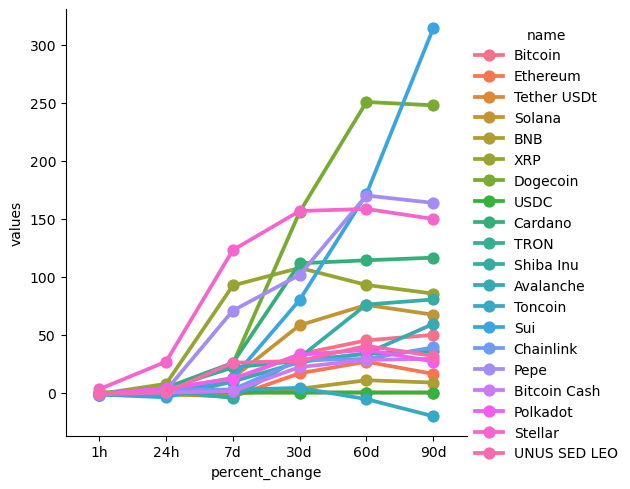

In [274]:
sns.catplot(x= "percent_change", y = "values", hue = "name", data = df7, kind ="point")

In [276]:
# to Visualize particicular coins eg Dogecoin
df8 = df2[["name", "quote.USD.price","timestamp"]]
df9 = df8.query("name == 'Dogecoin'")
df9

,name,quote.USD.price,timestamp
6,Dogecoin,0.37,2024-11-18 12:00:09.284176
26,Dogecoin,0.37,2024-11-18 12:05:10.783590
46,Dogecoin,0.37,2024-11-18 12:10:12.167277
66,Dogecoin,0.37,2024-11-18 12:15:13.354892
86,Dogecoin,0.37,2024-11-18 12:20:14.623678
106,Dogecoin,0.37,2024-11-18 12:25:15.865388
126,Dogecoin,0.37,2024-11-18 12:30:17.211375
146,Dogecoin,0.37,2024-11-18 12:35:18.310639
166,Dogecoin,0.37,2024-11-18 12:40:19.480339


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

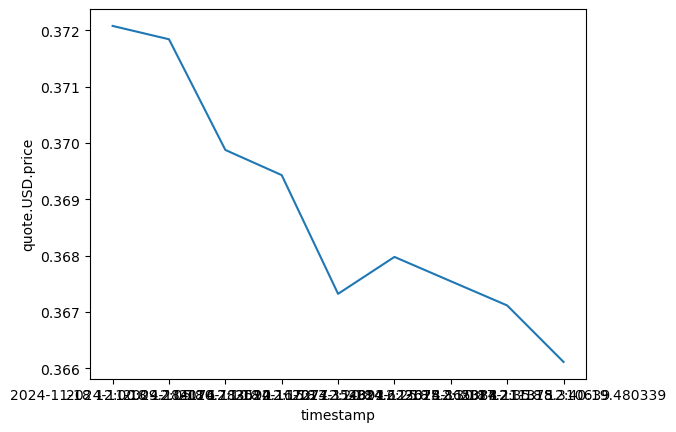

In [278]:
sns.lineplot(x='timestamp', y = 'quote.USD.price', data = df9)

In [391]:
# Creating a time_only column to improve the visibility of the x axis label
df10 = df9

time_list = []

for datetime_str in df10['timestamp']:
    time_only = datetime.datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S").time().strftime("%H:%M:%S")
    time_list.append(time_only)

df10['time_only'] = time_list

df10

C:\Users\Misha\AppData\Local\Temp\ipykernel_12072\2561368469.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['time_only'] = time_list


,name,quote.USD.price,timestamp,time_only
6,Dogecoin,0.37,2024-11-18 12:00:09,12:00:09
26,Dogecoin,0.37,2024-11-18 12:05:10,12:05:10
46,Dogecoin,0.37,2024-11-18 12:10:12,12:10:12
66,Dogecoin,0.37,2024-11-18 12:15:13,12:15:13
86,Dogecoin,0.37,2024-11-18 12:20:14,12:20:14
106,Dogecoin,0.37,2024-11-18 12:25:15,12:25:15
126,Dogecoin,0.37,2024-11-18 12:30:17,12:30:17
146,Dogecoin,0.37,2024-11-18 12:35:18,12:35:18
166,Dogecoin,0.37,2024-11-18 12:40:19,12:40:19


<Axes: xlabel='time_only', ylabel='quote.USD.price'>

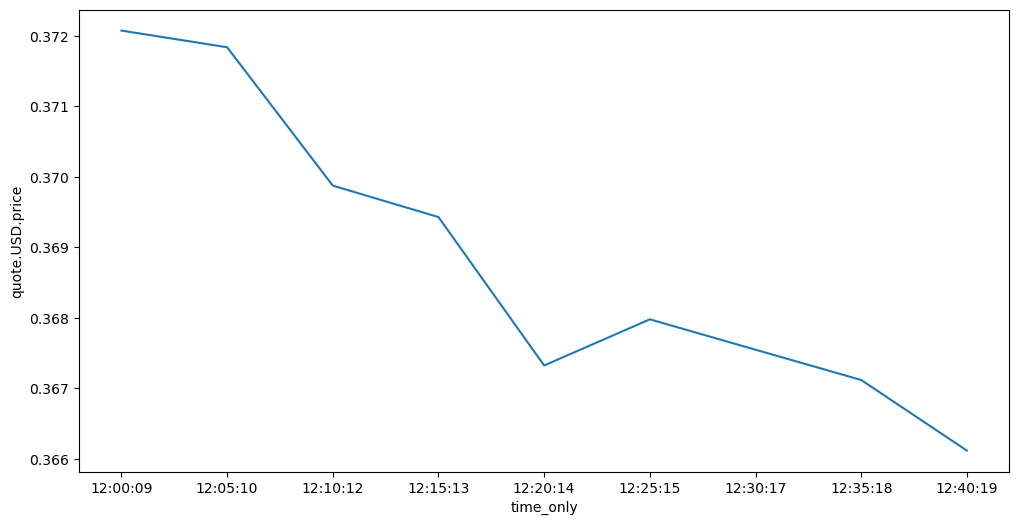

In [393]:
plt.figure(figsize=(12, 6)) 
sns.lineplot(x='time_only', y = 'quote.USD.price', data = df9)